## Домашнее задание № 4

### Ансамблевые методы 

**Дедлайн: 3.06.2020 00:30** 
Сопровождайте код изображениями и комментариями. Не игнорируйте вопросы, ваши выводы тоже оцениваются. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше. Не забывайте подписывать графики и будет вам счастье!

**Максимальный балл: 10**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

**0. (0 баллов) ** Загрузите [датасет](https://www.kaggle.com/uciml/pima-indians-diabetes-database/data), в нем вы найдете данные опрошенных женщин из индейского племени Пима. Будем решать задачу бинарной классификации: в колонке Outcome лежит метка наличия или отсутствия диабета - это наша целевая переменная. Есть ли пропущенные значения?

In [2]:
data = pd.read_csv('./diabetes.csv')
# Посмотрим на данные
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print('В данных есть пропуски? - {}'.format(data.isnull().any().any()))

В данных есть пропуски? - False


**1. (0.5 балла)** Как вы думаете, является ли наличие нулей в некоторых колонках фактом того, что эти признаки имеют пропущенные значения? Замените нули на среднее значение признака там, где считаете это целесообразным.

In [4]:
for i in data.columns:
    print('В признаке %s - %d нулей' % (i, (data[i] == 0).sum()))

В признаке Pregnancies - 111 нулей
В признаке Glucose - 5 нулей
В признаке BloodPressure - 35 нулей
В признаке SkinThickness - 227 нулей
В признаке Insulin - 374 нулей
В признаке BMI - 11 нулей
В признаке DiabetesPedigreeFunction - 0 нулей
В признаке Age - 0 нулей
В признаке Outcome - 500 нулей


Признак 'Pregnancies', означающий количество беременностей и имеющий нулевый значения вряд ли означает пропуски, скорее - отсутствие беременностей. 

В остальных столбцах: Glucose, BloodPressure, SkinThickness, Insulin, BMI, нулевое значение признака, вероятно, означает отсутсвие данных об этих показателях, ведь у живого человека, в соответствии со здравым смыслом, не может быть нулевое содержание глюкозы в крови или нулевой индекс массы тела и т.п. Заполним их средними значениями.

In [5]:
# Заполняем пропуски средними
for i in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    data[i].replace(0, np.NaN, inplace=True) # Заменим 0 NaN'ами, чтобы посчитать среднее, не включая пропуски
    data[i].fillna(data[i].mean(skipna=True), inplace=True)

In [6]:
# Проверка
for i in data.columns:
    print('В признаке %s - %d нулей' % (i, (data[i] == 0).sum()))

В признаке Pregnancies - 111 нулей
В признаке Glucose - 0 нулей
В признаке BloodPressure - 0 нулей
В признаке SkinThickness - 0 нулей
В признаке Insulin - 0 нулей
В признаке BMI - 0 нулей
В признаке DiabetesPedigreeFunction - 0 нулей
В признаке Age - 0 нулей
В признаке Outcome - 500 нулей


**2. (1 балл)** Визуализируйте распределение признаков по отдельности для больных диабетом и здоровых. Ваши графики должны быть примерно такими:

![Image](https://d.radikal.ru/d03/2005/f8/0ffb9443cbcf.png)

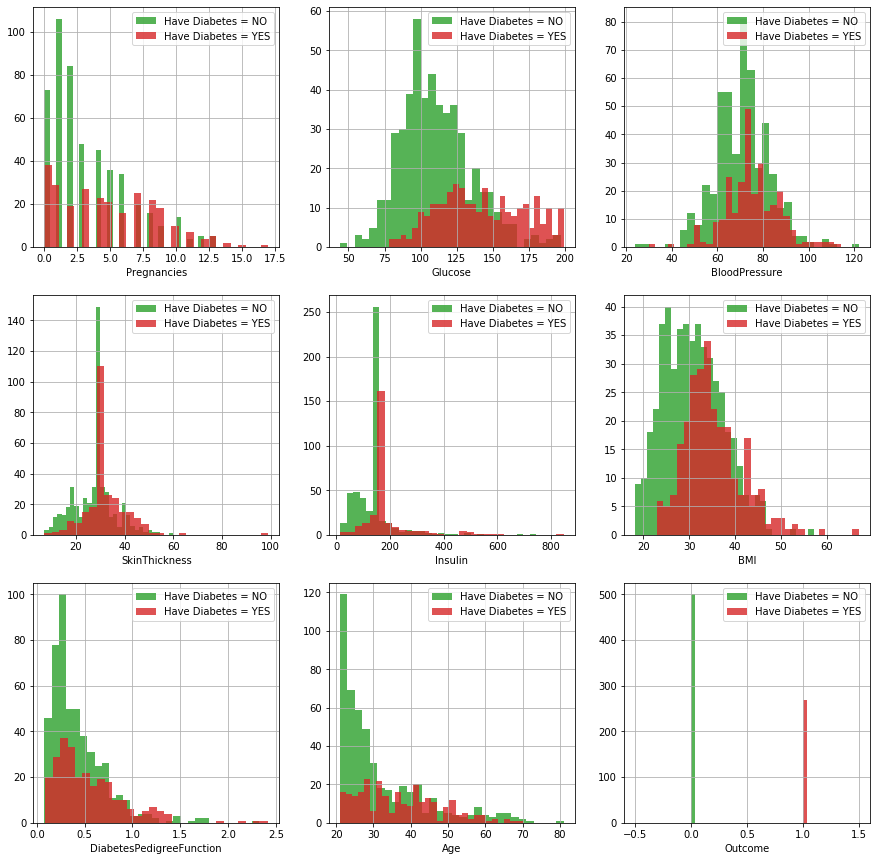

In [7]:
from itertools import product

# Плоскости
fig, ax = plt.subplots(3, 3, figsize = (15, 15))

# Индексы графиков
ind = [*product(range(3), repeat=2)]

# Наносим на график
for i, col in zip(ind, data.columns):
    for j in [(0, 'tab:green', 'NO'), (1, 'tab:red', 'YES')]:
        ax[i].hist(data[col][data['Outcome'] == j[0]],
                   bins = 30,
                   color = j[1],
                   alpha = 0.8,
                   label = "Have Diabetes = {}".format(j[2]))
        ax[i].set_xlabel(col)
        ax[i].legend()
        ax[i].grid(True)


**3. (2 балла)** Разбейте данные на обучающую и тестовую часть в соотношении 70:30. Обучите *BaggingClassifier* на деревьях (поставьте параметр *base_estimator = DecisionTreeClassifier()*) и *RandomForest*. Возьмите количество базовых алгоритмов, равное 10. Посчитайте accuracy, recall и precision. Есть ли какая-то разница между моделями и их результатами? Как вы думаете, почему получились такие результаты?

*tip: создайте отдельную функцию для вывода метрик качества;*

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [9]:
# Разделим датасет на предкторы и таргет
X = data.drop('Outcome', axis = 1)
y = data['Outcome']

del data

In [10]:
# Делим выборку на test и train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=29052020)

# Функция для показа метрик
def model_metrics(prediction, target):
    print('Accuracy of model: %f' % accuracy_score(prediction, target))
    print('Precision of model: %f' % precision_score(prediction, target))
    print('Recall of model: %f' % recall_score(prediction, target))

In [98]:
# BaggingClassifier + DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

BagCl = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                          n_estimators=10,
                          random_state=29052020).fit(X_train, y_train)

model_metrics(BagCl.predict(X_test), y_test)

Accuracy of model: 0.770563
Precision of model: 0.592593
Recall of model: 0.705882


In [97]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

RanForCl = RandomForestClassifier(random_state=29052020,
                                  n_estimators=10).fit(X_train, y_train)

model_metrics(RanForCl.predict(X_test), y_test)

Accuracy of model: 0.783550
Precision of model: 0.580247
Recall of model: 0.746032


Как можно видеть, модели показывают схожие результаты, с небольшой победой алгоритма RandomForestClassifier (с точки зрения accuracy и recall). Оба алгоритма одинаково ошибаются, предсказывая нужный класс (precision примерно одинаковый, показатель в 0,58 - 0,59 неудовлетворительный), в то время как RandomForestClassifier находит больше объектов искомого класс (recall весьма больше).

Это обусловлено тем, что алгоритмы работают схоже. В методе BaggingClassifier + DecisionTreeClassifier применяется бэггинг, в то время как в алгоритме RandomForestClassifier деревья обучаются на случайных подмножествах признаков - $\sqrt{\text{n_features}}$ по умолчанию.

**4. (2 балл)** Для случайного леса проанализируйте значение ROC-AUC на этих же данных в зависимости от изменения параметров:
* *n_estimators* (можно перебрать около 10 значений из отрезка от 10 до 1500)
* *min_samples_leaf* (сетку значений можете выбрать на ваше усмотрение)

Постройте соответствующие графики зависимости ROC-AUC от этих параметров. Какие выводы можете сделать?

In [106]:
# ROC-AUC для n_estimators
from sklearn.metrics import roc_auc_score

roc_auc = []

for i in range(10, 1511, 15):
    RanForCl = RandomForestClassifier(max_depth=None,
                                      random_state=29052020,
                                      n_estimators=i
                                      ).fit(X_train, y_train)
    roc_auc.append(roc_auc_score(RanForCl.predict(X_test), y_test))

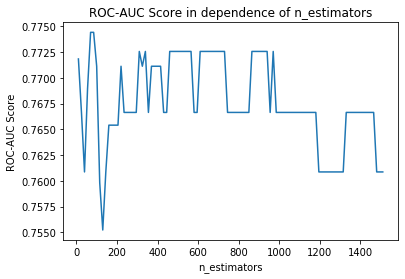

In [107]:
# ROC-AUC в зависимости от числа моделей
plt.plot(list(range(10, 1511, 15)), roc_auc)
plt.xlabel('n_estimators')
plt.ylabel('ROC-AUC Score')
plt.title('ROC-AUC Score in dependence of n_estimators')
plt.show()

Исходя из графика ROC-AUC Score, можно сделать вывод, что с увеличением количества моделей качество модели слегка падает, а затем останавливается примерно на одном уровне и разброс становиться меньше.

In [108]:
# ROC-AUC для min_samples_leaf

roc_auc = []

for i in range(1, 102, 2):
    RanForCl = RandomForestClassifier(max_depth=None,
                                      min_samples_leaf=i,
                                      random_state=29052020,
                                      n_estimators=10).fit(X_train, y_train)
    roc_auc.append(roc_auc_score(RanForCl.predict(X_test), y_test))

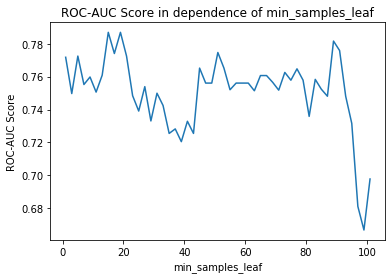

In [109]:
# ROC-AUC в зависимости от min_samples_leaf
plt.plot(list(range(1, 102, 2)), roc_auc)
plt.xlabel('min_samples_leaf')
plt.ylabel('ROC-AUC Score')
plt.title('ROC-AUC Score in dependence of min_samples_leaf')
plt.show()

С увеличением минимального количества объектов в листе качество модели колеблется от 0,73 до 0,79. Можно сказать, что минимальное количество объектов в листе значительно сказывается на качестве модели при адекватных (не слишком больших) значениях параметра. При очень больших значениях параметра, модель оказывается слишком простой, чтобы делать качественные предсказани. Оптимальное значение $\approx 20$ при n_estimators $= 10$

**5. (1 балл)**. Посмотрите, оказались ли какие-то признаки более важными, чем остальные? Воспользуйтесь соответствующим аттрибутом случайного леса в библиотеке sklearn, чтобы построить barplot.

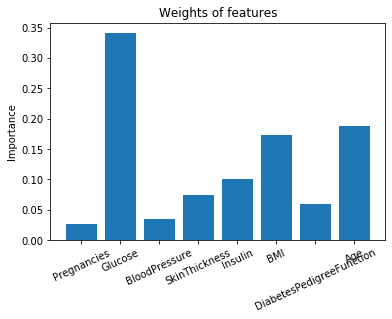

In [113]:
# Веса признаков
RanForCl = RandomForestClassifier(max_depth=None,
                                  random_state=29052020,
                                  n_estimators=10,
                                  min_samples_leaf=20).fit(X_train, y_train)

plt.bar(X_train.columns, RanForCl.feature_importances_)
plt.xticks(X_train.columns, rotation=25)
plt.title('Weights of features')
plt.ylabel('Importance')
plt.show()

На графике важности признаков видно, что наиболее значимым для предсказания диабета является показатель глюкозы в крови с весом почти 0,35. Далее идут такие показатели, как индекс массы тела и возраст - они на почти 0,2 менее значимы, чем глюкоза. Важность остальных признаков составляет от 0,025 до 0,1 для предсказания диабета.

**6. (2 балла)** Обучите HistGradientBoostingClassifier и GradientBoostingClassifier из sklearn. Опишите подробно, в чем заключается разница этих моделей. Подберите подходящее количество деревьев и проанализируйте метрики, с которыми мы работали выше.

In [117]:
# HistGradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

HistGB = HistGradientBoostingClassifier(random_state = 29052020).fit(X_train, y_train)

model_metrics(HistGB.predict(X_test), y_test)

Accuracy of model: 0.757576
Precision of model: 0.592593
Recall of model: 0.676056


In [33]:
# Подбор оптимальных параметров для HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

grid_searcher = GridSearchCV(
    HistGradientBoostingClassifier(),
    param_grid={
        'max_iter': [10, 50, 100, 300, 500, 1000],
        'max_leaf_nodes': [10, 31, 50, None],
        'min_samples_leaf': [2, 8, 20, 40]
    },
    cv=3, # Кросс-валидация
    verbose=2 # Прогресс
)
grid_searcher.fit(X_train, y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] max_iter=10, max_leaf_nodes=10, min_samples_leaf=2 ..............
[CV]  max_iter=10, max_leaf_nodes=10, min_samples_leaf=2, total=   0.0s
[CV] max_iter=10, max_leaf_nodes=10, min_samples_leaf=2 ..............
[CV]  max_iter=10, max_leaf_nodes=10, min_samples_leaf=2, total=   0.0s
[CV] max_iter=10, max_leaf_nodes=10, min_samples_leaf=2 ..............
[CV]  max_iter=10, max_leaf_nodes=10, min_samples_leaf=2, total=   0.0s
[CV] max_iter=10, max_leaf_nodes=10, min_samples_leaf=8 ..............
[CV]  max_iter=10, max_leaf_nodes=10, min_samples_leaf=8, total=   0.0s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] max_iter=10, max_leaf_nodes=10, min_samples_leaf=8 ..............
[CV]  max_iter=10, max_leaf_nodes=10, min_samples_leaf=8, total=   0.0s
[CV] max_iter=10, max_leaf_nodes=10, min_samples_leaf=8 ..............
[CV]  max_iter=10, max_leaf_nodes=10, min_samples_leaf=8, total=   0.0s
[CV] max_iter=10, max_leaf_nodes=10, min_samples_leaf=20 .............
[CV]  max_iter=10, max_leaf_nodes=10, min_samples_leaf=20, total=   0.0s
[CV] max_iter=10, max_leaf_nodes=10, min_samples_leaf=20 .............
[CV]  max_iter=10, max_leaf_nodes=10, min_samples_leaf=20, total=   0.0s
[CV] max_iter=10, max_leaf_nodes=10, min_samples_leaf=20 .............
[CV]  max_iter=10, max_leaf_nodes=10, min_samples_leaf=20, total=   0.1s
[CV] max_iter=10, max_leaf_nodes=10, min_samples_leaf=40 .............
[CV]  max_iter=10, max_leaf_nodes=10, min_samples_leaf=40, total=   0.0s
[CV] max_iter=10, max_leaf_nodes=10, min_samples_leaf=40 .............
[CV]  max_iter=10, max_leaf_nodes=10, min_samples_leaf=40, total= 

[CV]  max_iter=50, max_leaf_nodes=31, min_samples_leaf=2, total=   0.6s
[CV] max_iter=50, max_leaf_nodes=31, min_samples_leaf=2 ..............
[CV]  max_iter=50, max_leaf_nodes=31, min_samples_leaf=2, total=   0.6s
[CV] max_iter=50, max_leaf_nodes=31, min_samples_leaf=8 ..............
[CV]  max_iter=50, max_leaf_nodes=31, min_samples_leaf=8, total=   0.5s
[CV] max_iter=50, max_leaf_nodes=31, min_samples_leaf=8 ..............
[CV]  max_iter=50, max_leaf_nodes=31, min_samples_leaf=8, total=   0.4s
[CV] max_iter=50, max_leaf_nodes=31, min_samples_leaf=8 ..............
[CV]  max_iter=50, max_leaf_nodes=31, min_samples_leaf=8, total=   0.4s
[CV] max_iter=50, max_leaf_nodes=31, min_samples_leaf=20 .............
[CV]  max_iter=50, max_leaf_nodes=31, min_samples_leaf=20, total=   0.2s
[CV] max_iter=50, max_leaf_nodes=31, min_samples_leaf=20 .............
[CV]  max_iter=50, max_leaf_nodes=31, min_samples_leaf=20, total=   0.2s
[CV] max_iter=50, max_leaf_nodes=31, min_samples_leaf=20 ...........

[CV]  max_iter=100, max_leaf_nodes=31, min_samples_leaf=40, total=   0.4s
[CV] max_iter=100, max_leaf_nodes=31, min_samples_leaf=40 ............
[CV]  max_iter=100, max_leaf_nodes=31, min_samples_leaf=40, total=   0.3s
[CV] max_iter=100, max_leaf_nodes=50, min_samples_leaf=2 .............
[CV]  max_iter=100, max_leaf_nodes=50, min_samples_leaf=2, total=   2.7s
[CV] max_iter=100, max_leaf_nodes=50, min_samples_leaf=2 .............
[CV]  max_iter=100, max_leaf_nodes=50, min_samples_leaf=2, total=   2.4s
[CV] max_iter=100, max_leaf_nodes=50, min_samples_leaf=2 .............
[CV]  max_iter=100, max_leaf_nodes=50, min_samples_leaf=2, total=   2.5s
[CV] max_iter=100, max_leaf_nodes=50, min_samples_leaf=8 .............
[CV]  max_iter=100, max_leaf_nodes=50, min_samples_leaf=8, total=   1.6s
[CV] max_iter=100, max_leaf_nodes=50, min_samples_leaf=8 .............
[CV]  max_iter=100, max_leaf_nodes=50, min_samples_leaf=8, total=   1.6s
[CV] max_iter=100, max_leaf_nodes=50, min_samples_leaf=8 ....

[CV]  max_iter=300, max_leaf_nodes=50, min_samples_leaf=20, total=   1.5s
[CV] max_iter=300, max_leaf_nodes=50, min_samples_leaf=20 ............
[CV]  max_iter=300, max_leaf_nodes=50, min_samples_leaf=20, total=   1.5s
[CV] max_iter=300, max_leaf_nodes=50, min_samples_leaf=40 ............
[CV]  max_iter=300, max_leaf_nodes=50, min_samples_leaf=40, total=   0.8s
[CV] max_iter=300, max_leaf_nodes=50, min_samples_leaf=40 ............
[CV]  max_iter=300, max_leaf_nodes=50, min_samples_leaf=40, total=   0.8s
[CV] max_iter=300, max_leaf_nodes=50, min_samples_leaf=40 ............
[CV]  max_iter=300, max_leaf_nodes=50, min_samples_leaf=40, total=   0.8s
[CV] max_iter=300, max_leaf_nodes=None, min_samples_leaf=2 ...........
[CV]  max_iter=300, max_leaf_nodes=None, min_samples_leaf=2, total=   5.2s
[CV] max_iter=300, max_leaf_nodes=None, min_samples_leaf=2 ...........
[CV]  max_iter=300, max_leaf_nodes=None, min_samples_leaf=2, total=   6.0s
[CV] max_iter=300, max_leaf_nodes=None, min_samples_le

[CV]  max_iter=500, max_leaf_nodes=None, min_samples_leaf=8, total=   3.9s
[CV] max_iter=500, max_leaf_nodes=None, min_samples_leaf=8 ...........
[CV]  max_iter=500, max_leaf_nodes=None, min_samples_leaf=8, total=   3.8s
[CV] max_iter=500, max_leaf_nodes=None, min_samples_leaf=20 ..........
[CV]  max_iter=500, max_leaf_nodes=None, min_samples_leaf=20, total=   2.9s
[CV] max_iter=500, max_leaf_nodes=None, min_samples_leaf=20 ..........
[CV]  max_iter=500, max_leaf_nodes=None, min_samples_leaf=20, total=   2.8s
[CV] max_iter=500, max_leaf_nodes=None, min_samples_leaf=20 ..........
[CV]  max_iter=500, max_leaf_nodes=None, min_samples_leaf=20, total=   2.9s
[CV] max_iter=500, max_leaf_nodes=None, min_samples_leaf=40 ..........
[CV]  max_iter=500, max_leaf_nodes=None, min_samples_leaf=40, total=   1.5s
[CV] max_iter=500, max_leaf_nodes=None, min_samples_leaf=40 ..........
[CV]  max_iter=500, max_leaf_nodes=None, min_samples_leaf=40, total=   1.5s
[CV] max_iter=500, max_leaf_nodes=None, min_

[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed:  8.7min finished


GridSearchCV(cv=3, estimator=HistGradientBoostingClassifier(),
             param_grid={'max_iter': [10, 50, 100, 300, 500, 1000],
                         'max_leaf_nodes': [10, 31, 50, None],
                         'min_samples_leaf': [2, 8, 20, 40]},
             verbose=2)

In [34]:
# Оптимальные параметры и метрики HistGradientBoostingClassifier
print(grid_searcher.best_params_)
model_metrics(grid_searcher.predict(X_test), y_test)

{'max_iter': 50, 'max_leaf_nodes': 10, 'min_samples_leaf': 40}
Accuracy of model: 0.761905
Precision of model: 0.617284
Recall of model: 0.675676


In [118]:
# GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier(random_state = 29052020).fit(X_train, y_train)

model_metrics(GB.predict(X_test), y_test)

Accuracy of model: 0.761905
Precision of model: 0.617284
Recall of model: 0.675676


In [35]:
# Подбор оптимальных параметров GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

grid_searcher = GridSearchCV(
    GradientBoostingClassifier(),
    param_grid={
        'n_estimators': [10, 50, 100, 300, 500, 1000],
        'max_leaf_nodes': [10, 31, 50, None],
        'min_samples_leaf': [2, 8, 20, 40],
    },
    cv=3, # Кросс-валидация
    verbose=2
)
grid_searcher.fit(X_train, y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] max_leaf_nodes=10, min_samples_leaf=2, n_estimators=10 ..........
[CV]  max_leaf_nodes=10, min_samples_leaf=2, n_estimators=10, total=   0.0s
[CV] max_leaf_nodes=10, min_samples_leaf=2, n_estimators=10 ..........
[CV]  max_leaf_nodes=10, min_samples_leaf=2, n_estimators=10, total=   0.0s
[CV] max_leaf_nodes=10, min_samples_leaf=2, n_estimators=10 ..........
[CV]  max_leaf_nodes=10, min_samples_leaf=2, n_estimators=10, total=   0.0s
[CV] max_leaf_nodes=10, min_samples_leaf=2, n_estimators=50 ..........
[CV]  max_leaf_nodes=10, min_samples_leaf=2, n_estimators=50, total=   0.0s
[CV] max_leaf_nodes=10, min_samples_leaf=2, n_estimators=50 ..........
[CV]  max_leaf_nodes=10, min_samples_leaf=2, n_estimators=50, total=   0.0s
[CV] max_leaf_nodes=10, min_samples_leaf=2, n_estimators=50 ..........
[CV]  max_leaf_nodes=10, min_samples_leaf=2, n_estimators=50, total=   0.0s
[CV] max_leaf_nodes=10, min_samples_leaf=2, n_estimators

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_leaf_nodes=10, min_samples_leaf=2, n_estimators=100, total=   0.1s
[CV] max_leaf_nodes=10, min_samples_leaf=2, n_estimators=100 .........
[CV]  max_leaf_nodes=10, min_samples_leaf=2, n_estimators=100, total=   0.1s
[CV] max_leaf_nodes=10, min_samples_leaf=2, n_estimators=100 .........
[CV]  max_leaf_nodes=10, min_samples_leaf=2, n_estimators=100, total=   0.1s
[CV] max_leaf_nodes=10, min_samples_leaf=2, n_estimators=300 .........
[CV]  max_leaf_nodes=10, min_samples_leaf=2, n_estimators=300, total=   0.2s
[CV] max_leaf_nodes=10, min_samples_leaf=2, n_estimators=300 .........
[CV]  max_leaf_nodes=10, min_samples_leaf=2, n_estimators=300, total=   0.2s
[CV] max_leaf_nodes=10, min_samples_leaf=2, n_estimators=300 .........
[CV]  max_leaf_nodes=10, min_samples_leaf=2, n_estimators=300, total=   0.3s
[CV] max_leaf_nodes=10, min_samples_leaf=2, n_estimators=500 .........
[CV]  max_leaf_nodes=10, min_samples_leaf=2, n_estimators=500, total=   0.4s
[CV] max_leaf_nodes=10, min_samples

[CV]  max_leaf_nodes=10, min_samples_leaf=40, n_estimators=300, total=   0.2s
[CV] max_leaf_nodes=10, min_samples_leaf=40, n_estimators=300 ........
[CV]  max_leaf_nodes=10, min_samples_leaf=40, n_estimators=300, total=   0.2s
[CV] max_leaf_nodes=10, min_samples_leaf=40, n_estimators=300 ........
[CV]  max_leaf_nodes=10, min_samples_leaf=40, n_estimators=300, total=   0.2s
[CV] max_leaf_nodes=10, min_samples_leaf=40, n_estimators=500 ........
[CV]  max_leaf_nodes=10, min_samples_leaf=40, n_estimators=500, total=   0.3s
[CV] max_leaf_nodes=10, min_samples_leaf=40, n_estimators=500 ........
[CV]  max_leaf_nodes=10, min_samples_leaf=40, n_estimators=500, total=   0.3s
[CV] max_leaf_nodes=10, min_samples_leaf=40, n_estimators=500 ........
[CV]  max_leaf_nodes=10, min_samples_leaf=40, n_estimators=500, total=   0.3s
[CV] max_leaf_nodes=10, min_samples_leaf=40, n_estimators=1000 .......
[CV]  max_leaf_nodes=10, min_samples_leaf=40, n_estimators=1000, total=   0.7s
[CV] max_leaf_nodes=10, min

[CV]  max_leaf_nodes=31, min_samples_leaf=20, n_estimators=300, total=   0.2s
[CV] max_leaf_nodes=31, min_samples_leaf=20, n_estimators=500 ........
[CV]  max_leaf_nodes=31, min_samples_leaf=20, n_estimators=500, total=   0.3s
[CV] max_leaf_nodes=31, min_samples_leaf=20, n_estimators=500 ........
[CV]  max_leaf_nodes=31, min_samples_leaf=20, n_estimators=500, total=   0.3s
[CV] max_leaf_nodes=31, min_samples_leaf=20, n_estimators=500 ........
[CV]  max_leaf_nodes=31, min_samples_leaf=20, n_estimators=500, total=   0.3s
[CV] max_leaf_nodes=31, min_samples_leaf=20, n_estimators=1000 .......
[CV]  max_leaf_nodes=31, min_samples_leaf=20, n_estimators=1000, total=   0.7s
[CV] max_leaf_nodes=31, min_samples_leaf=20, n_estimators=1000 .......
[CV]  max_leaf_nodes=31, min_samples_leaf=20, n_estimators=1000, total=   0.8s
[CV] max_leaf_nodes=31, min_samples_leaf=20, n_estimators=1000 .......
[CV]  max_leaf_nodes=31, min_samples_leaf=20, n_estimators=1000, total=   0.9s
[CV] max_leaf_nodes=31, m

[CV]  max_leaf_nodes=50, min_samples_leaf=8, n_estimators=500, total=   0.4s
[CV] max_leaf_nodes=50, min_samples_leaf=8, n_estimators=500 .........
[CV]  max_leaf_nodes=50, min_samples_leaf=8, n_estimators=500, total=   0.4s
[CV] max_leaf_nodes=50, min_samples_leaf=8, n_estimators=1000 ........
[CV]  max_leaf_nodes=50, min_samples_leaf=8, n_estimators=1000, total=   0.8s
[CV] max_leaf_nodes=50, min_samples_leaf=8, n_estimators=1000 ........
[CV]  max_leaf_nodes=50, min_samples_leaf=8, n_estimators=1000, total=   0.7s
[CV] max_leaf_nodes=50, min_samples_leaf=8, n_estimators=1000 ........
[CV]  max_leaf_nodes=50, min_samples_leaf=8, n_estimators=1000, total=   0.8s
[CV] max_leaf_nodes=50, min_samples_leaf=20, n_estimators=10 .........
[CV]  max_leaf_nodes=50, min_samples_leaf=20, n_estimators=10, total=   0.0s
[CV] max_leaf_nodes=50, min_samples_leaf=20, n_estimators=10 .........
[CV]  max_leaf_nodes=50, min_samples_leaf=20, n_estimators=10, total=   0.0s
[CV] max_leaf_nodes=50, min_samp

[CV]  max_leaf_nodes=None, min_samples_leaf=2, n_estimators=500, total=   0.4s
[CV] max_leaf_nodes=None, min_samples_leaf=2, n_estimators=1000 ......
[CV]  max_leaf_nodes=None, min_samples_leaf=2, n_estimators=1000, total=   0.8s
[CV] max_leaf_nodes=None, min_samples_leaf=2, n_estimators=1000 ......
[CV]  max_leaf_nodes=None, min_samples_leaf=2, n_estimators=1000, total=   0.8s
[CV] max_leaf_nodes=None, min_samples_leaf=2, n_estimators=1000 ......
[CV]  max_leaf_nodes=None, min_samples_leaf=2, n_estimators=1000, total=   0.8s
[CV] max_leaf_nodes=None, min_samples_leaf=8, n_estimators=10 ........
[CV]  max_leaf_nodes=None, min_samples_leaf=8, n_estimators=10, total=   0.0s
[CV] max_leaf_nodes=None, min_samples_leaf=8, n_estimators=10 ........
[CV]  max_leaf_nodes=None, min_samples_leaf=8, n_estimators=10, total=   0.0s
[CV] max_leaf_nodes=None, min_samples_leaf=8, n_estimators=10 ........
[CV]  max_leaf_nodes=None, min_samples_leaf=8, n_estimators=10, total=   0.0s
[CV] max_leaf_nodes=N

[CV]  max_leaf_nodes=None, min_samples_leaf=40, n_estimators=1000, total=   0.7s
[CV] max_leaf_nodes=None, min_samples_leaf=40, n_estimators=1000 .....
[CV]  max_leaf_nodes=None, min_samples_leaf=40, n_estimators=1000, total=   0.8s
[CV] max_leaf_nodes=None, min_samples_leaf=40, n_estimators=1000 .....
[CV]  max_leaf_nodes=None, min_samples_leaf=40, n_estimators=1000, total=   1.0s


[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed:  1.2min finished


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'max_leaf_nodes': [10, 31, 50, None],
                         'min_samples_leaf': [2, 8, 20, 40],
                         'n_estimators': [10, 50, 100, 300, 500, 1000]},
             verbose=2)

In [36]:
# Оптимальные параметры и метрики для GradientBoostingClassifier
print(grid_searcher.best_params_)
model_metrics(grid_searcher.predict(X_test), y_test)

{'max_leaf_nodes': 10, 'min_samples_leaf': 40, 'n_estimators': 100}
Accuracy of model: 0.766234
Precision of model: 0.604938
Recall of model: 0.690141


При подборе параметров для HistGradientBoostingClassifier удалось слегка повысить accuracy и precision, показатель recall незначительно упал. 
Для GradientBoostingClassifier - слегка повысилось accuracy, а recall вырос на 0,02. В то же время precision упал на 0,01. 

В целом, модели дают схожую точность. Ключевое отличие HistGradientBoostingClassifier от GradientBoostingClassifier заключается в том, что первая модель ищет разбиения не по всем признакам, а по их гистограммам распределения. Это позволяет добиться более высокой скорости обучения на больших выборках (n_samples >= 10 000, как указано в документации). В нашем случае, объем наблюдений небольшой - 768.

**7. (1.5 балла)** Вспомните, что представляет собой [стэкинг моделей](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html#sklearn.ensemble.StackingClassifier). Возьмите в качестве базовых моделей любой ансамблевый метод из тех, которые были использованы выше, и простой классфикатор из уже вами изученных на курсе. Как final_estimator используйте лог-регресссию. Посчитайте метрики для мета-классификатора. Улучшилось ли качество?

In [28]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

*tip: не забудьте завести список базовых алгоритмов*
<code>
base_learners = [
                 ('name1', model1(),
                 ('name2', model2())             
                ]

</code>

In [120]:
# StackingClassifier
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=10,
                                  min_samples_leaf=20,
                                  random_state=29052020)),
    ('gb', GradientBoostingClassifier(n_estimators=100,
                                      max_leaf_nodes=10,
                                      min_samples_leaf=40,
                                      random_state = 29052020))
]
StCl = StackingClassifier(
    estimators=base_learners, final_estimator=LogisticRegression(max_iter=1000)
).fit(X_train, y_train)

model_metrics(StCl.predict(X_test), y_test)

Accuracy of model: 0.783550
Precision of model: 0.641975
Recall of model: 0.712329


C помощью мета-классификатора действительно удалось поднять качество модели. Получилось достичь аccuracy 0.78 как у RandomForest, но при этом значительно увеличить precision модели до 0,64. Несмотря на то, что полнота упала 0.71, на мой взгяд, это наилучшее качество среди остальных моделей.